In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# Â© IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

In [2]:
## References for Question 3, Question 4 and Question 5
## https://medium.com/jun-devpblog/cv-6-structure-extraction-with-hough-transform-line-circle-aaf8be62f169
## https://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

In [3]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt

Upload 'pic1.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [4]:
img = imageio.imread('pic1.png')       

Please refer lecture slides for hints for applying the algorithm.

Also, for clarity, looking at every variable's values and dimensions is recommended.

In [5]:
def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    
    """
    Input:

    img - 2-D binary image
    
    angle_step - Spacing between angles between -90 and 90 degrees. Default step is 1.

    lines_are_white - boolean indicating whether lines to be detected are white

    value_threshold - Pixel values above or below the value_threshold are edges

    Returns:
    
    accumulator - 2D array of the hough transform accumulator
    
    theta - Array of angles used in computation, in radians.
    
    rhos - Array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    cos_t = np.cos(thetas)    ## Using numpy function np.cos, calculate cosine values of theta and store in variable cos_t ## 
    sin_t = np.sin(thetas)    ## Using numpy function np.sin, calculate sine values of theta and store in variable sin_t ##
    

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    
    accumulator = np.zeros((2*diag_len, num_thetas), dtype=np.uint8)    ## Using numpy, declare a zero matrix of Hough accumulator array #
                                                                         # of theta vs rho of size (2*diag_len, num_thetas), keep dtype=np.uint8, name it accumulator ##
    
  
    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    x_idxs = np.zeros((1,height*width))    ## In the img matrix, find where are black and white pixels # 
    y_idxs = np.zeros((1,height*width))     # and store the indexes of the white edge pixels in x_idxs and y_idxs ##  
    index = 0

    for i in range(height):
        for j in range(width):
            if(img[i,j] == 255):
                    x_idxs[0,index]=j
                    y_idxs[0,index]=i
                    index=index+1
    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    for i in range(index):                                                                          ## Write a for loop inside a for loop to do voting in accumulator; the first one recurses through x_idxs #
        for j in range(num_thetas):                                                                  # the second one recurses through thetas; in which  #
            rho = diag_len + int(round(x_idxs[0,i] * cos_t[j] + y_idxs[0,i] * sin_t[j]))             # for every value of thetas[i], calculate rho value using rho = diag_len + int(round(x * cos_t[i] + y * sin_t[i])) formula #
            accumulator[rho,j]=accumulator[rho,j]+1                                                  # and increment the accumulator for that specific (rho, theta)
                                       
    
    return accumulator, thetas, rhos

In [6]:
## Do not change anything in this block ##

def display_hough(img, accumulator, thetas, rhos, save_path=None):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')


Click on Runtime and select Run all before submitting this file.

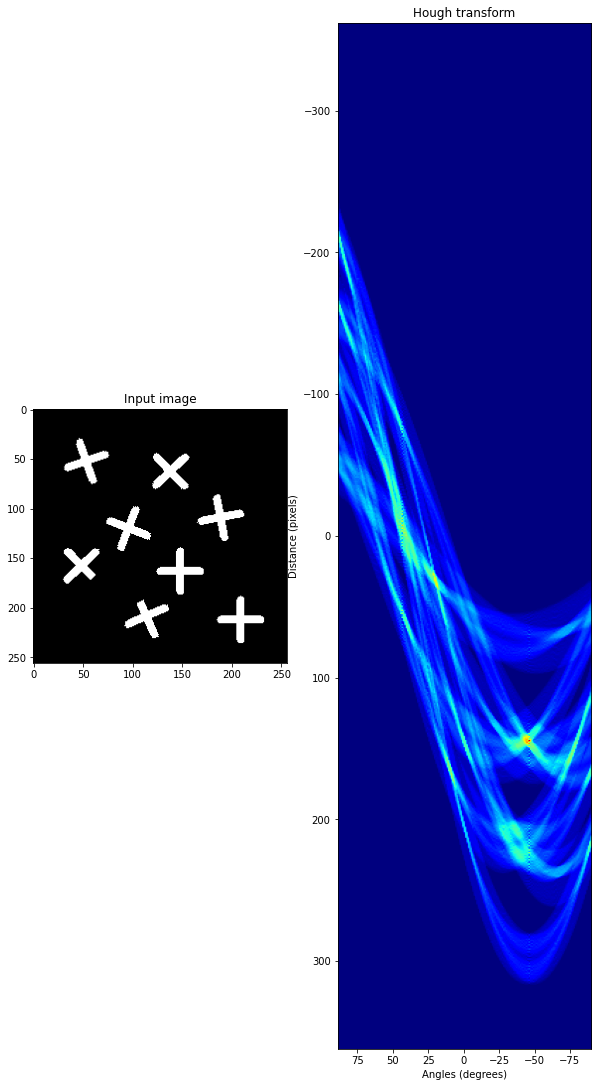

In [7]:
accumulator, thetas, rhos = line_detect_hough(img)
display_hough(img, accumulator, thetas, rhos)

In [8]:
## In this block, print the maxima(s) in the accumulator 
## and the rho,theta value(s) for which it occurs.
## You are allowed to use the above functions and modify them inside this block (if required).

# Write your code here #
accumulator, thetas, rhos = line_detect_hough(img)
print('Maxima value:')
print(accumulator.max())

b,c = np.where(accumulator == accumulator.max())
print('Corresponding rho and theta')
print(b,thetas[c])

Maxima value:
163
Corresponding rho and theta
[506] [0.78539816]
